<a href="https://colab.research.google.com/github/FarkhandaMalik/dip-lab2/blob/main/DIPLab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('g63.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

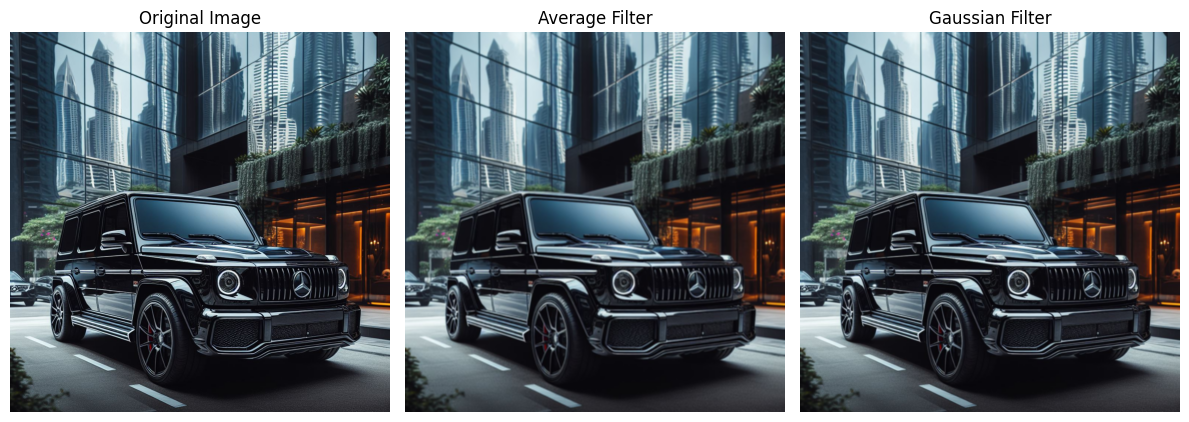

In [6]:
average_filter = cv2.blur(image, (5, 5))
gaussian_filter = cv2.GaussianBlur(image, (5, 5), 0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Average Filter')
plt.imshow(average_filter)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Filter')
plt.imshow(gaussian_filter)
plt.axis('off')

plt.tight_layout()
plt.show()

Task 2

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rank_filter

In [8]:
image = cv2.imread('g63.jpg', cv2.IMREAD_GRAYSCALE)

In [16]:
if image is None:
     raise ValueError("Image not found or unable to load.")

if len(image.shape) != 2:
    raise ValueError("The image should be a grayscale image.")

print("Image shape:", image.shape)

try:
    rank_12 = rank_filter(image, rank=12, size=5)
except RuntimeError as e:
    print("Error applying rank filter with rank=12:", e)

try:
    rank_1 = rank_filter(image, rank=1, size=5)
except RuntimeError as e:
    print("Error applying rank filter with rank=1:", e)

try:
    rank_24 = rank_filter(image, rank=24, size=5)
except RuntimeError as e:
    print("Error applying rank filter with rank=24:", e)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

if 'rank_12' in locals():
    plt.subplot(2, 2, 2)
    plt.title('Rank Filter (Rank = 12)')
    plt.imshow(rank_12, cmap='gray')
    plt.axis('off')

if 'rank_1' in locals():
    plt.subplot(2, 2, 3)
    plt.title('Rank Filter (Rank = 1)')
    plt.imshow(rank_1, cmap='gray')
    plt.axis('off')

if 'rank_24' in locals():
    plt.subplot(2, 2, 4)
    plt.title('Rank Filter (Rank = 24)')
    plt.imshow(rank_24, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

ValueError: Image not found or unable to load.

Task 3

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

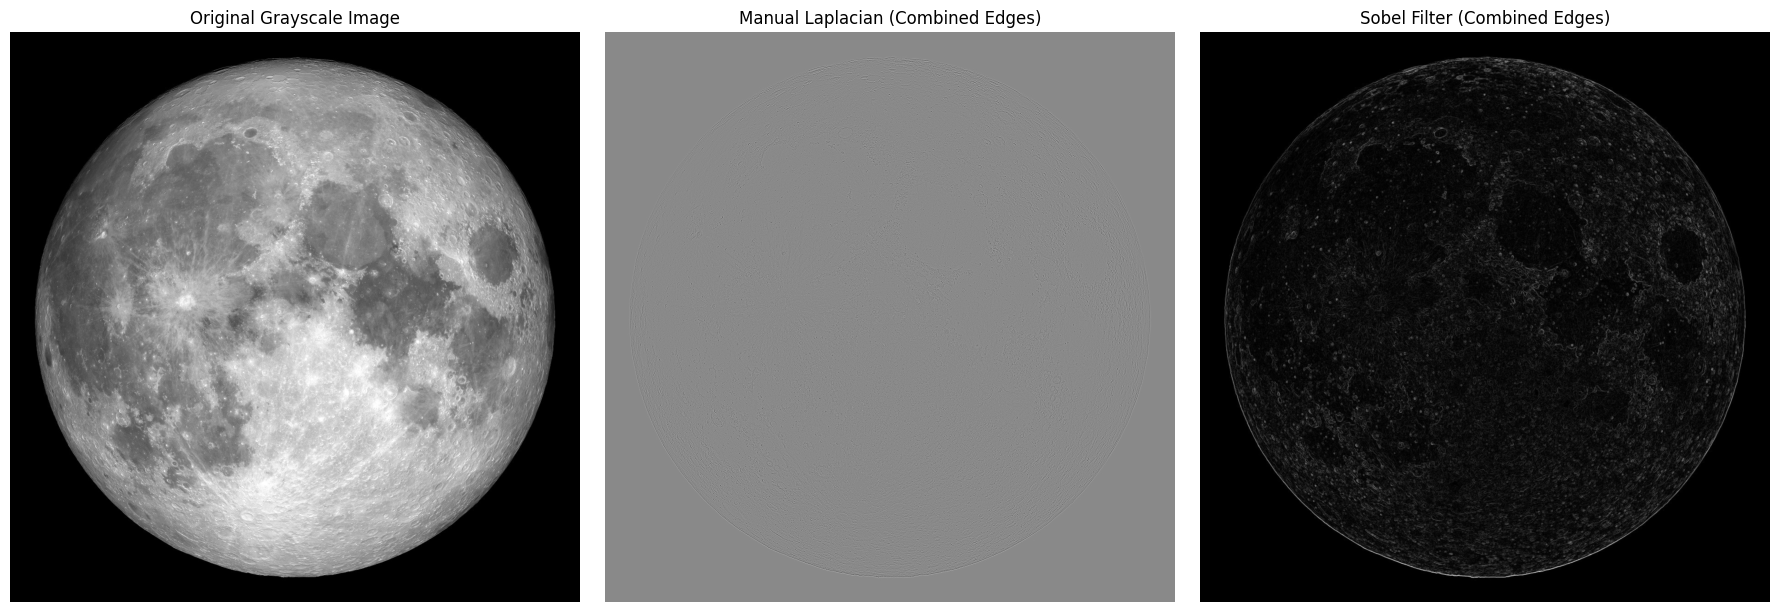

In [18]:
def mylaplacian(img):
    """
    Custom implementation of the second-order derivative (manual Laplacian).
    This extracts horizontal and vertical edges collectively.
    """
    img = img.astype(np.float32)
    rows, cols = img.shape
    vertical_edges = np.zeros_like(img)
    horizontal_edges = np.zeros_like(img)

    for x in range(1, rows - 1):
        for y in range(1, cols - 1):
            vertical_edges[x, y] = img[x + 1, y] + img[x - 1, y] - 2 * img[x, y]
            horizontal_edges[x, y] = img[x, y + 1] + img[x, y - 1] - 2 * img[x, y]

    combined_edges = vertical_edges + horizontal_edges

    combined_edges = cv2.normalize(combined_edges, None, 0, 255, cv2.NORM_MINMAX)
    return combined_edges.astype(np.uint8)

image_path = 'Picture1.jpg'
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

manual_laplacian_result = mylaplacian(original_img)

sobel_x = cv2.Sobel(original_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(manual_laplacian_result, cmap='gray')
plt.title("Manual Laplacian (Combined Edges)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Filter (Combined Edges)")
plt.axis("off")

plt.tight_layout()
plt.show()